In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # For classification tasks
# from sklearn.ensemble import RandomForestRegressor  # For regression tasks
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree


In [35]:
df = pd.read_excel('creditcardmarketing_processed.xlsx')
display(df)

,Customer Number,# Bank Accounts Open,# Credit Cards Held,# Homes Owned,Household Size,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance,Reward_Cash Back,Reward_Points,Mailer Type_Postcard,Income Level_Low,Income Level_Medium,Overdraft Protection_Yes,Credit Rating_Low,Credit Rating_Medium,Own Your Home_Yes,Offer Accepted_1
0,1,1,2,1,4,1160.75,1669.0,877.0,1095.0,1002.0,0,0,0,0,0,0,0,0,0,0
1,2,1,2,2,5,147.25,39.0,106.0,78.0,366.0,0,0,0,0,1,0,0,1,1,0
2,3,2,2,1,2,276.50,367.0,352.0,145.0,242.0,0,0,1,0,0,0,0,1,1,0
3,4,2,1,1,4,1219.00,1578.0,1760.0,1119.0,419.0,0,0,0,0,1,0,0,0,0,0
4,5,1,2,1,6,1211.00,2140.0,1357.0,982.0,365.0,0,0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,17996,1,1,1,5,167.50,136.0,65.0,71.0,398.0,1,0,0,0,0,0,1,0,1,0
17996,17997,1,3,1,3,850.50,984.0,940.0,943.0,535.0,1,0,0,0,0,0,1,0,1,0
17997,17998,1,2,1,4,1087.25,918.0,767.0,1170.0,1494.0,1,0,0,0,0,0,1,0,0,0
17998,17999,1,4,2,2,1022.25,626.0,983.0,865.0,1615.0,1,0,0,0,1,0,0,1,1,0


Random forest

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#drop na
df = df.dropna()

# Split data into features (X) and target variable (y)
X = df.drop('Offer Accepted_1', axis=1)  
X = df.drop('Customer Number', axis=1)  
y = df['Offer Accepted_1']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an initial Random Forest model to analyze feature importance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances from the trained model
feature_importances = rf_model.feature_importances_

# Print or visualize feature importances to identify relevant features
for feature, importance in zip(X.columns, feature_importances):
    print(f'{feature} importance: {importance}')

# Based on feature importances, select relevant features
selected_features = X.columns[feature_importances > 0.1] 
print(selected_features)

# Create a new DataFrame with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train the Random Forest model using the selected features
rf_model_selected = RandomForestClassifier(random_state=42)
rf_model_selected.fit(X_train_selected, y_train)

# Evaluate the model's performance using the testing set
accuracy = rf_model_selected.score(X_test_selected, y_test)
print(f'Accuracy on selected features: {accuracy}')


Customer Number importance: 0.12693334703382084
# Bank Accounts Open importance: 0.017834799247292702
# Credit Cards Held importance: 0.0345056902752596
# Homes Owned importance: 0.017331230159127645
Household Size importance: 0.0485781417031084
Average Balance importance: 0.12359322337271744
Q1 Balance importance: 0.1253262714958389
Q2 Balance importance: 0.12417395297367616
Q3 Balance importance: 0.12469628109120645
Q4 Balance importance: 0.12379569520185474
Reward_Cash Back importance: 0.011844617665708893
Reward_Points importance: 0.01592999060505691
Mailer Type_Postcard importance: 0.017384895259453324
Income Level_Low importance: 0.01412273814684189
Income Level_Medium importance: 0.011301779852499617
Overdraft Protection_Yes importance: 0.013086393927681012
Credit Rating_Low importance: 0.025547035501119843
Credit Rating_Medium importance: 0.006301496003298691
Own Your Home_Yes importance: 0.01771242048443708
Index(['Customer Number', 'Average Balance', 'Q1 Balance', 'Q2 Balance

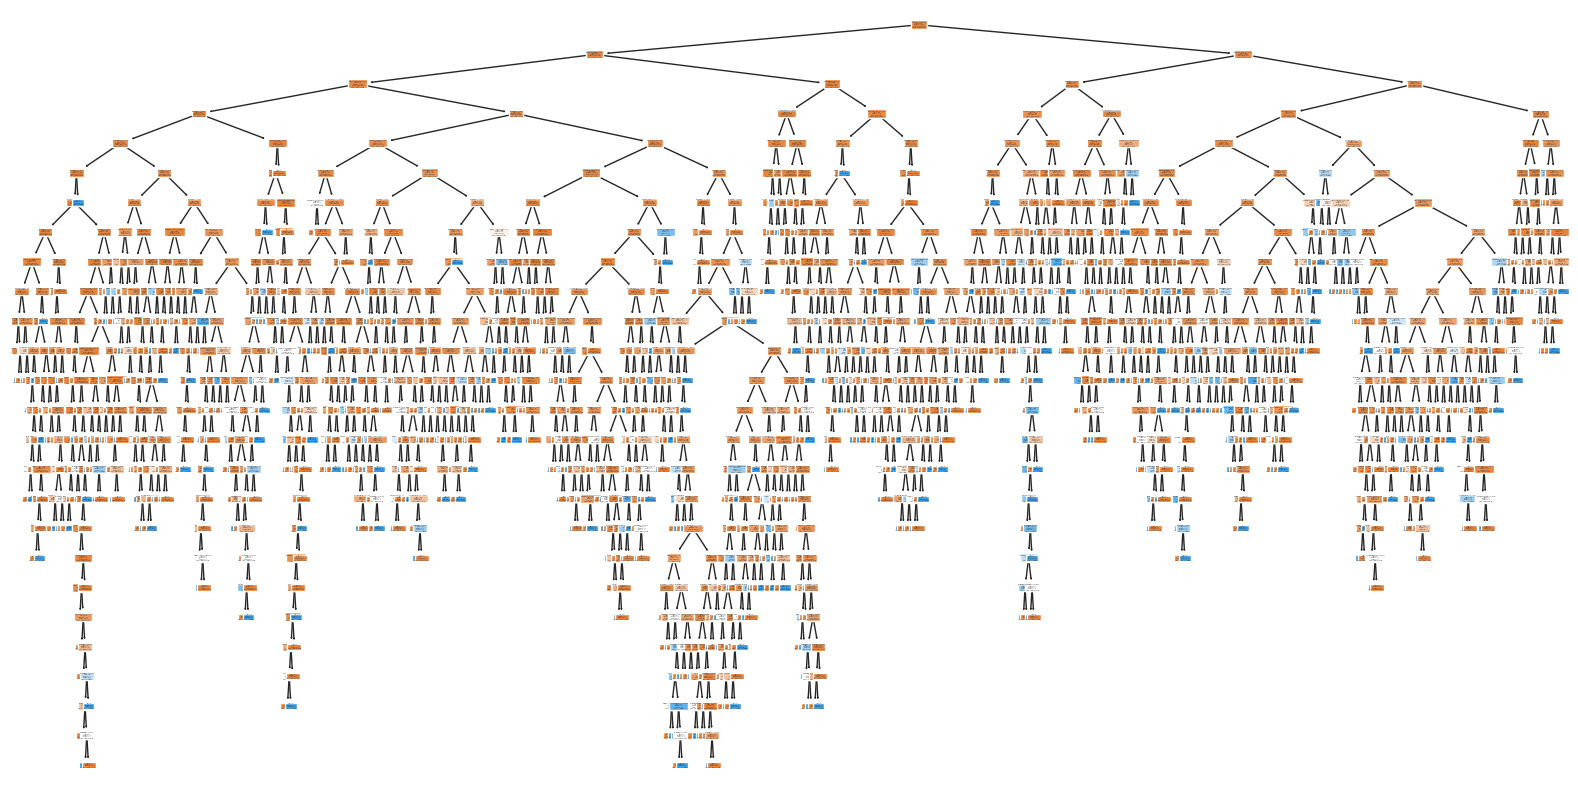

In [47]:
# Visualize the first tree in the Random Forest
plt.figure(figsize=(20, 10)) 
plot_tree(rf_model.estimators_[0], feature_names=X.columns, class_names=['Not Accepted', 'Accepted'], filled=True)
plt.show()